In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
# load file and format
master = pd.read_csv("../data/master/studytime.csv")

In [88]:
def create_heatmap_data(df):
    df = df[['day of week', 'start_date', 'end_date']]
    df['start_date'] = pd.to_datetime(df['start_date'])
    df['end_date'] = pd.to_datetime(df['end_date'])

    # identify start and stop by the quarter hour
    df['quarter_hour_start'] = (df['start_date'].dt.hour * 3600 + df['start_date'].dt.minute * 60 + df['start_date'].dt.second) / 60 // 15
    df['quarter_hour_end'] = (df['end_date'].dt.hour * 3600 + df['end_date'].dt.minute * 60 + df['end_date'].dt.second) / 60 // 15

    df.drop(columns=['start_date', 'end_date'], inplace=True)

    # generate frequency data
    new_data = []
    for _, row in df.iterrows():
        for i in range(int(row['quarter_hour_start']), int(row['quarter_hour_end']) + 1):
            new_data.append({'day': row['day of week'], 'bin': i})

    df = pd.DataFrame(new_data)
    df["day"] = pd.Categorical(df["day"], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)
    all_bins = list(range(32, 96))
    df = df.groupby(['day', 'bin']).size().unstack().reindex(columns=all_bins, fill_value=0).T.sort_index(ascending=False)

    return df

In [89]:
def plot_heatmap(df):
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(df, cmap="Reds", ax=ax, cbar=False)
    ax.set_title("Study Time Heatmap")
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    time_labels = pd.date_range("08:00", "23:30", freq="30min").strftime("%I:%M %p").tolist()[::-1]
    ax.set_yticklabels(time_labels)
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='both', length=0)
    plt.show()

/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_10788/2377396493.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['day', 'bin']).size().unstack().reindex(columns=all_bins, fill_value=0).T.sort_index(ascending=False)


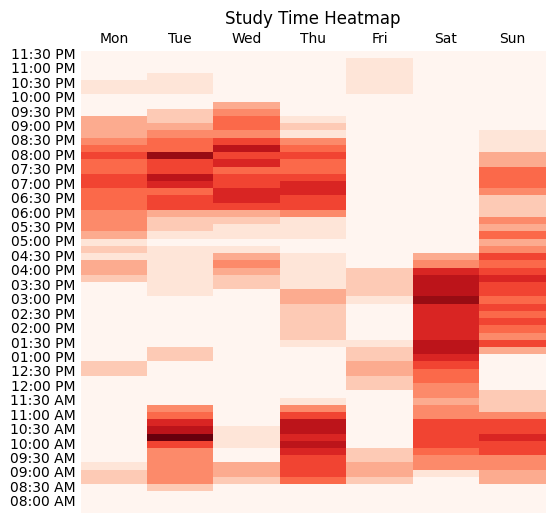

In [90]:
# Plot heatmap
plot_heatmap(create_heatmap_data(master[master['term'] == 'sp25']))

/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_10788/2377396493.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['day', 'bin']).size().unstack().reindex(columns=all_bins, fill_value=0).T.sort_index(ascending=False)


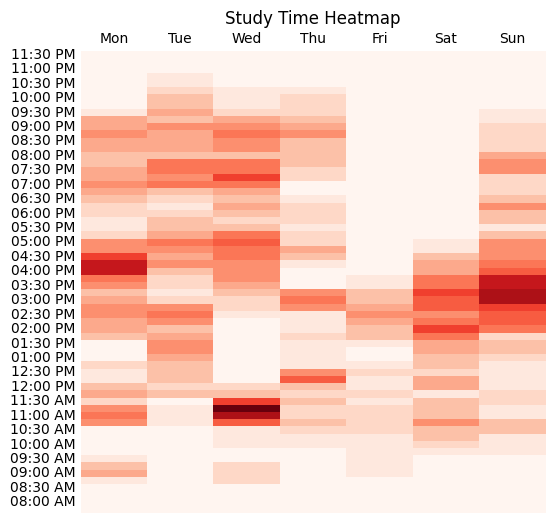

In [91]:
# Plot heatmap
plot_heatmap(create_heatmap_data(master[master['term'] == 'fa24']))

/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_10788/2377396493.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['day', 'bin']).size().unstack().reindex(columns=all_bins, fill_value=0).T.sort_index(ascending=False)


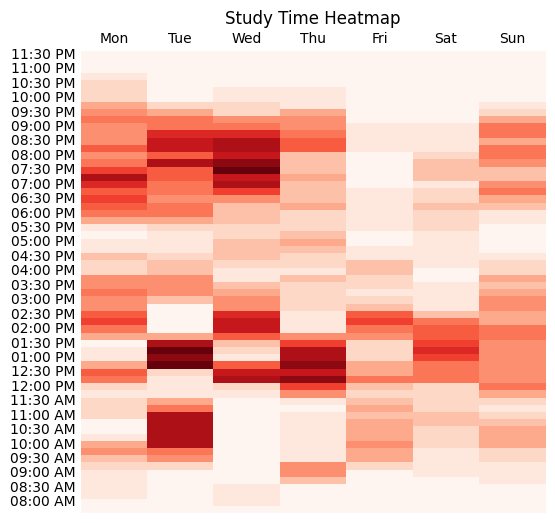

In [92]:
# Plot heatmap
plot_heatmap(create_heatmap_data(master[master['term'] == 'sp24']))

/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_10788/2377396493.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['day', 'bin']).size().unstack().reindex(columns=all_bins, fill_value=0).T.sort_index(ascending=False)


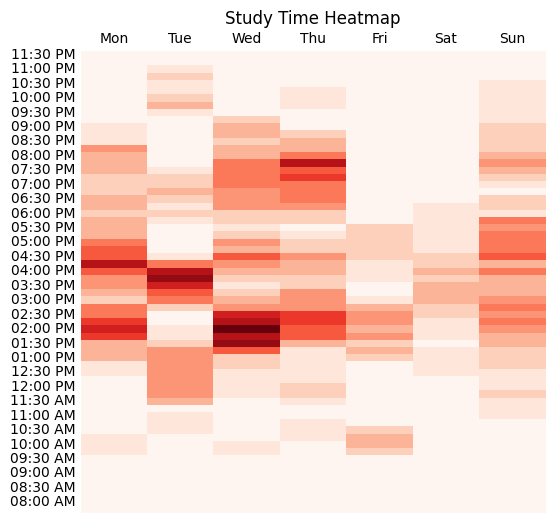

In [93]:
# Plot heatmap
plot_heatmap(create_heatmap_data(master[master['term'] == 'fa23']))

/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_10788/2377396493.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['day', 'bin']).size().unstack().reindex(columns=all_bins, fill_value=0).T.sort_index(ascending=False)
/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_10788/2377396493.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['day', 'bin']).size().unstack().reindex(columns=all_bins, fill_value=0).T.sort_index(ascending=False)
/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_10788/2377396493.py:21: FutureWarning: The default of observe

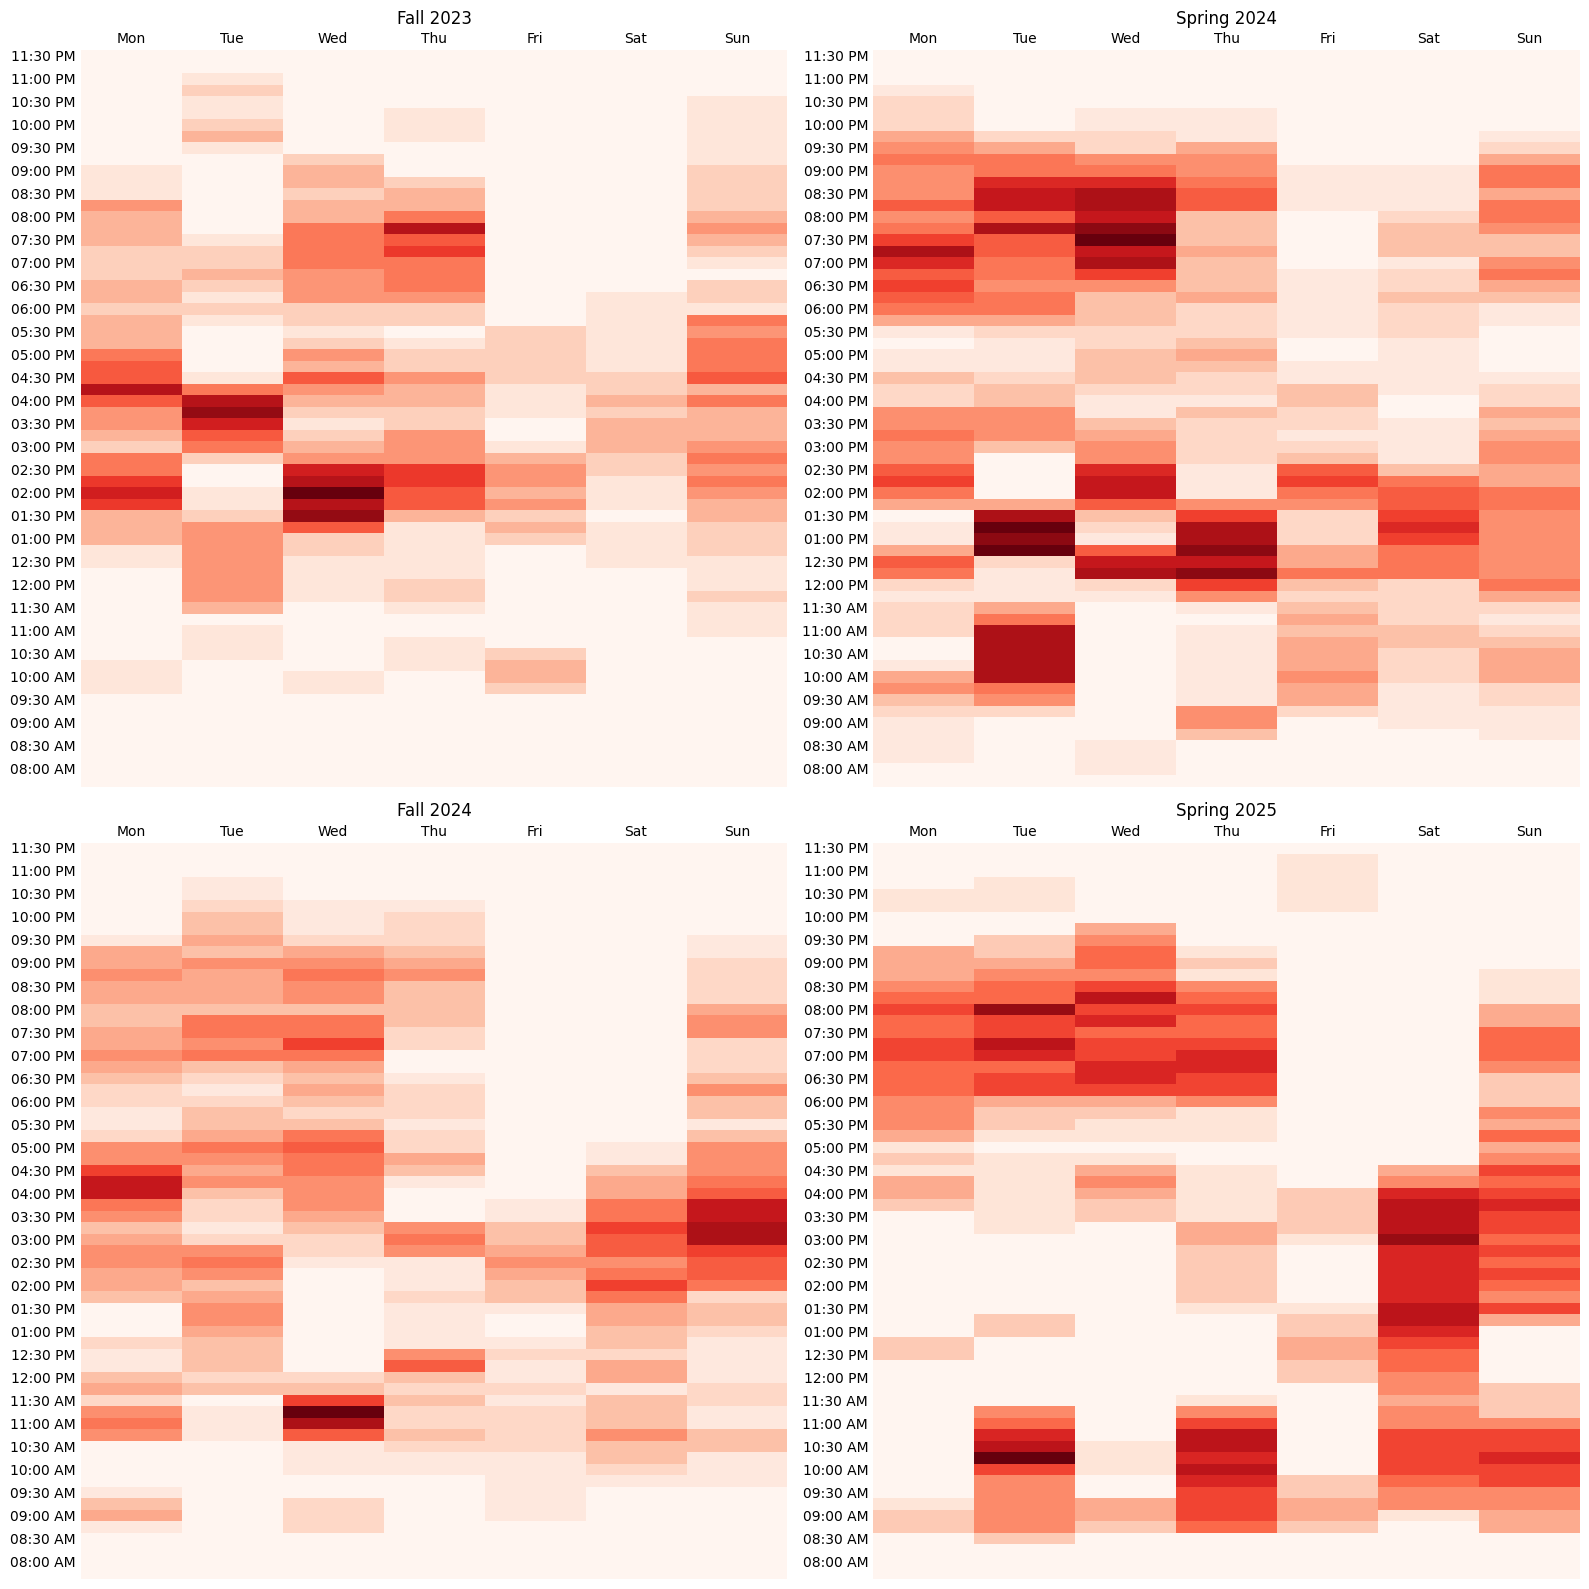

In [94]:
fig, ax = plt.subplots(2,2, figsize=[16, 16])

for i, term in enumerate(['fa23', 'sp24', 'fa24', 'sp25']):
    if i == 0:
        x=0
        y=0
    if i == 1:
        x=0
        y=1
    if i == 2:
        x=1
        y=0
    if i == 3:
        x=1
        y=1

    df1 = create_heatmap_data(master[master['term'] == term])

    sns.heatmap(df1, cmap="Reds", ax=ax[x,y], cbar=False)
 
    # ax.set_title("Study Time Heatmap")
    ax[x,y].set_ylabel(None)
    ax[x,y].set_xlabel(None)

    ax[x,y].set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    time_labels = pd.date_range("08:00", "23:30", freq="30min").strftime("%I:%M %p").tolist()[::-1]
    ax[x,y].set_yticklabels(time_labels)
    ax[x,y].xaxis.set_ticks_position('top')
    ax[x,y].tick_params(axis='both', length=0, rotation=0)

    
    # if (x == 1):
    #     ax[x,y].set_xlabel("Week")
    # if (y == 0):
    #     ax[x,y].set_ylabel("Duration (hrs)")


# FIGURE
# Subplot Titles
ax[0,0].set_title("Fall 2023")
ax[0,1].set_title("Spring 2024")
ax[1,0].set_title("Fall 2024")
ax[1,1].set_title("Spring 2025")

# Axis Limit
# plt.xlim(1, 17)

plt.tight_layout()
plt.show()
fig.savefig('../results/heatmap_by_weekday.png')